In [2]:
import numpy as np
from scipy.special import ellipk
import matplotlib.pyplot as plt
import mpmath as mp

In [71]:
a = mp.ellipk(0.5j)
float(a.real)+1j*float(a.imag)

(1.521861568515865+0.17969676966530013j)

/home/hyejin/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/hyejin/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


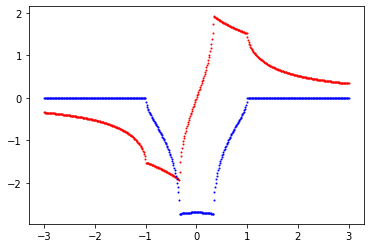

In [101]:
def dos(z):
    x1 = 1/2 + 1/2 * 3/(3*z)**2 - 1/2 * np.sqrt(1-9/(3*z)**2) * np.sqrt(1-1/(3*z)**2)
    x2 = x1/(x1-1)
    kp2 = 1/2 + 1/4 * x2 * np.sqrt(4-x2) - 1/4 * (2-x2) * np.sqrt(1-x2)
    km2 = kp2 - 1/2 * x2 * np.sqrt(4-x2)
    kp2e = np.array([float(mp.ellipk(x).real)+1j*float(mp.ellipk(x).imag) for i,x in enumerate(kp2)])
    km2e = np.array([float(mp.ellipk(x).real)+1j*float(mp.ellipk(x).imag) for i,x in enumerate(km2)])
    dos = 1/z * np.sqrt(1-3/4*x1) / (1-x1) * ((2/np.pi)*kp2e) * ((2/np.pi)*km2e)
    return dos
z = np.linspace(-3, 3, 500, dtype='float64') + 1e-20j
plt.plot(z, dos(z).real, 'r.', ms = 2)
plt.plot(z, dos(z).imag, 'b.', ms = 2)

In [108]:
mp.ellipk(complex(0.5))
complex(0.5)

(0.5+0j)

In [100]:
a = np.array([0.5j, 0.5j, 0.5j])
b = np.array([float(mp.ellipk(x).real)+1j*float(mp.ellipk(x).imag) for i,x in enumerate(a)])
b

array([1.52186157+0.17969677j, 1.52186157+0.17969677j,
       1.52186157+0.17969677j])

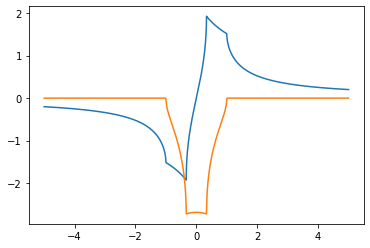

In [105]:
D = 1
out_node = 2
directory = '../1_dmftsolver/NRG'

w, A,Gr,Gi,_,_,_,_,_,_ = np.loadtxt(f'{directory}/B_14_beta10000/Bethe-{2.5:.3f}.dat', \
                       unpack = True, dtype = 'complex128')
w += 1e-20*1j

dosss = dos(w)

plt.plot(w.real, dosss.real)
plt.plot(w.real, dosss.imag)


np.savetxt('dos_cubic.dat', np.array([w.real, dosss.real, dosss.imag]).T)

/home/hyejin/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/hyejin/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


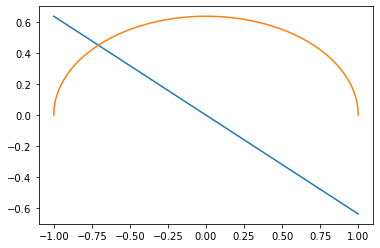

In [83]:
def bdos(z):
    a = np.sign(-z+1)
    return -2/np.pi*(z-1j*np.sqrt(1-z**2)*np.sign(z.imag))

x = np.linspace(-1.0, 1.0, num=2001, endpoint=True)+1e-20*1j
dosr = np.zeros(len(x))
dosi = np.zeros(len(x))

for i, ww in enumerate(x):
    dosr[i] = bdos(ww).real
    dosi[i] = bdos(ww).imag

plt.plot(x, dosr)
plt.plot(x, dosi)


np.savetxt('dos_bethe.dat', np.array([x.real, dosr.real]).T)

/home/hyejin/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/hyejin/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-5.0, 5.0)

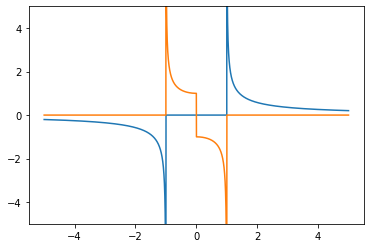

In [88]:
plt.plot(z, (1/z * 1/np.sqrt(1-1/z**2)).real)
plt.plot(z, (1/z * 1/np.sqrt(1-1/z**2)).imag)
plt.ylim(-5, 5)